In [17]:
import pandas as pd
import numpy as np
import pandas_datareader as pdr
from pandas_datareader import data, wb

import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['figure.figsize'] = (20,8)

import yfinance

In [18]:
start = "1994-01-07"
end = "2020-01-01"
SNP = data.DataReader('^GSPC', 'yahoo', start=start,end=end)
DAX = data.DataReader('^GDAXI', 'yahoo', start=start,end=end)
# FTSE = data.DataReader('^FTSE', 'yahoo', start=start,end=end)
FTSE = yfinance.download('^FTSE', start, end,)
NIKKEI = data.DataReader('^N225', 'yahoo', start=start,end=end)

[*********************100%***********************]  1 of 1 completed


In [26]:
SNP

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
1994-01-06,469.000000,467.019989,467.549988,467.119995,365960000,467.119995
1994-01-07,470.260010,467.029999,467.089996,469.899994,324920000,469.899994
1994-01-10,475.269989,469.549988,469.899994,475.269989,319490000,475.269989
1994-01-11,475.279999,473.269989,475.269989,474.130005,305490000,474.130005
1994-01-12,475.059998,472.140015,474.130005,474.170013,310690000,474.170013
...,...,...,...,...,...,...
2019-12-24,3226.429932,3220.510010,3225.449951,3223.379883,1296540000,3223.379883
2019-12-26,3240.080078,3227.199951,3227.199951,3239.909912,2160680000,3239.909912
2019-12-27,3247.929932,3234.370117,3247.229980,3240.020020,2428670000,3240.020020


In [34]:
STOCK_GROUP = [SNP,DAX,FTSE,NIKKEI]
STOCK_GROUP_NAME = ['SNP','DAX','FTSE','NIKKEI']


df = pd.DataFrame()
for i,group in enumerate(STOCK_GROUP):
    group.name = STOCK_GROUP_NAME[i]
    df[group.name] = group.Close
    
df.head()

,SNP,DAX,FTSE,NIKKEI
Date,,,,
1994-01-06,467.119995,NaN,3403.000000,NaN
1994-01-07,469.899994,2224.949951,3446.000000,18124.009766
1994-01-10,475.269989,2225.000000,3440.600098,18443.439453
1994-01-11,474.130005,2228.100098,3413.800049,18485.250000
1994-01-12,474.170013,2182.060059,3372.000000,18793.880859


In [35]:
# how many nan?

df.isna().sum()

SNP         0
DAX       130
FTSE      123
NIKKEI    372
dtype: int64

In [48]:
df.reset_index(inplace= True)

In [50]:
df.rename(columns= {"Date":"date"}, inplace=True)
df['date'] = pd.to_datetime(df['date'])
df.info()
df.set_index('date', inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6543 entries, 0 to 6542
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    6543 non-null   datetime64[ns]
 1   SNP     6543 non-null   float64       
 2   DAX     6413 non-null   float64       
 3   FTSE    6420 non-null   float64       
 4   NIKKEI  6171 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 255.7 KB


In [54]:
df = df.asfreq('b')

In [56]:
df.isna().sum()

SNP       236
DAX       366
FTSE      359
NIKKEI    608
dtype: int64

In [57]:
df.fillna(method = 'ffill', inplace= True)

In [58]:
df.isna().sum()

SNP       0
DAX       1
FTSE      0
NIKKEI    1
dtype: int64

In [59]:
df.fillna(method = 'bfill', inplace= True)

In [60]:
df.isna().sum()

SNP       0
DAX       0
FTSE      0
NIKKEI    0
dtype: int64

In [61]:
### Splliting data 80-20

In [64]:
int(len(df)* 0.80)

5423

In [72]:
size = int(len(df)*0.80)
print(size)

train = df.iloc[:size]
test = df.iloc[size:]

len(train), len(test), len(df), len(train) + len(test)

5423


(5423, 1356, 6779, 6779)

# White Noise

In [76]:
train.drop(columns=['DAX', 'DAX', 'FTSE', 'NIKKEI'] , inplace= True)
test.drop(columns=['DAX', 'DAX', 'FTSE', 'NIKKEI'] , inplace= True)

C:\Users\user\Anaconda3\envs\pfs\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [84]:
wn = np.random.normal(loc = df.SNP.mean(), scale= df.SNP.std(), size = len(df.SNP))

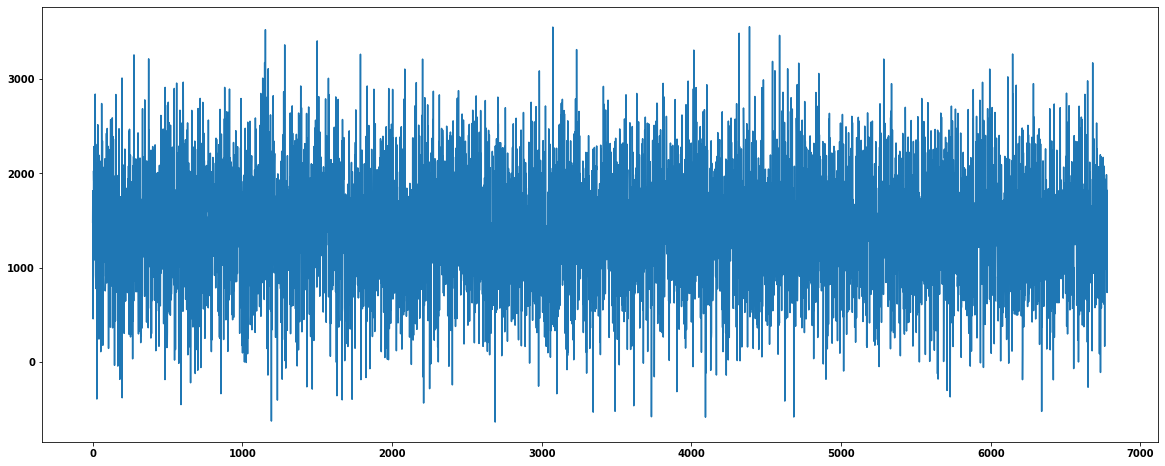

In [85]:
plt.plot(wn)

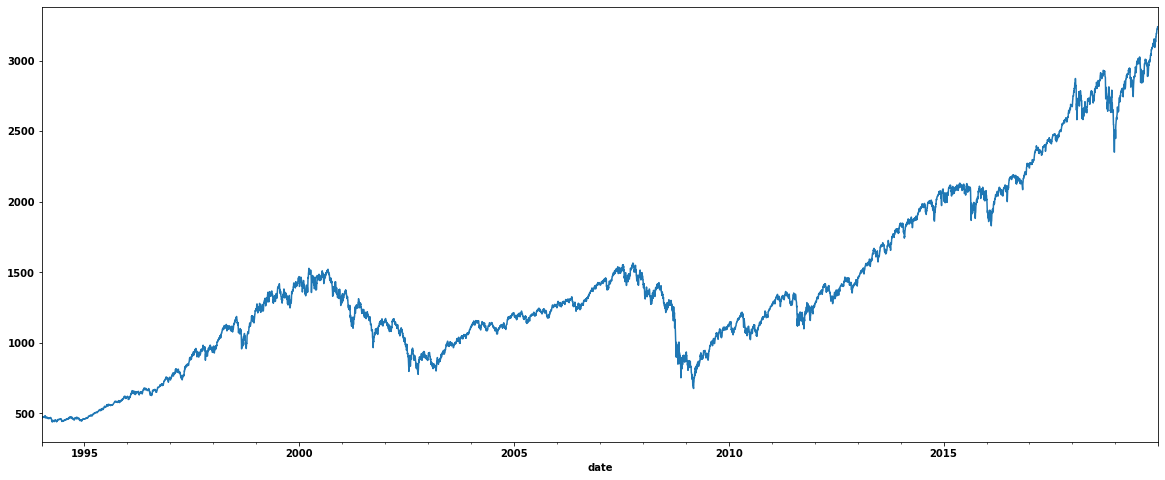

In [89]:
df.SNP.plot()